In [1]:
# Retail Sales Data Analysis

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("../data/cleaned_sales_data.csv")
df.head()

,Transaction_ID,Date,Customer_ID,Gender,Age,Product_Category,Quantity,Price_per_Unit,Total_Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [4]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction_ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer_ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product_Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price_per_Unit    1000 non-null   int64 
 8   Total_Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


,Transaction_ID,Age,Quantity,Price_per_Unit,Total_Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


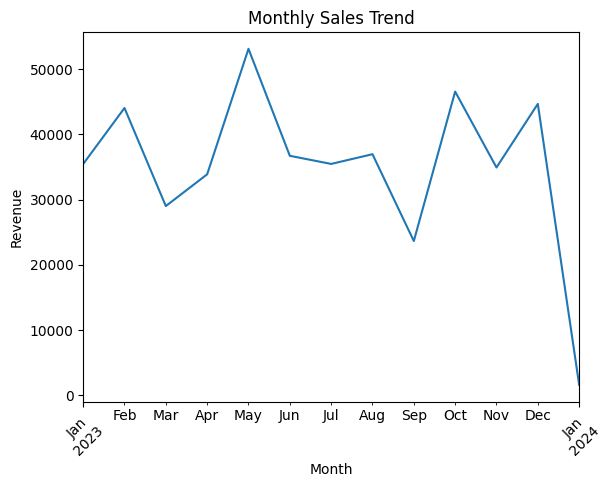

In [5]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.to_period('M')

monthly_sales = df.groupby('Month')['Total_Amount'].sum()

monthly_sales.plot()
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.show()

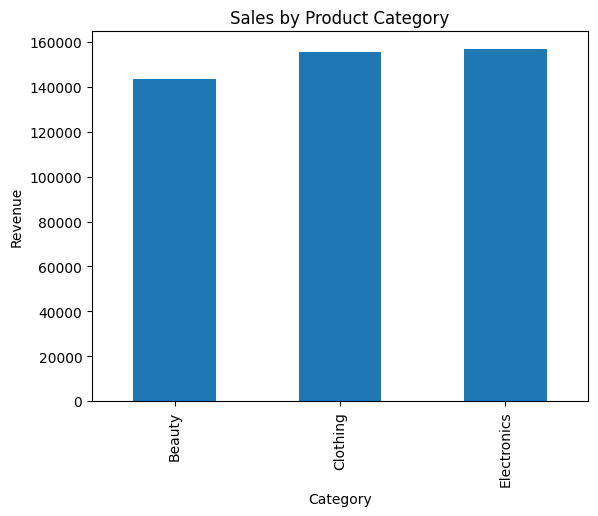

In [6]:
category_sales = df.groupby('Product_Category')['Total_Amount'].sum()

category_sales.plot(kind='bar')
plt.title("Sales by Product Category")
plt.xlabel("Category")
plt.ylabel("Revenue")
plt.show()

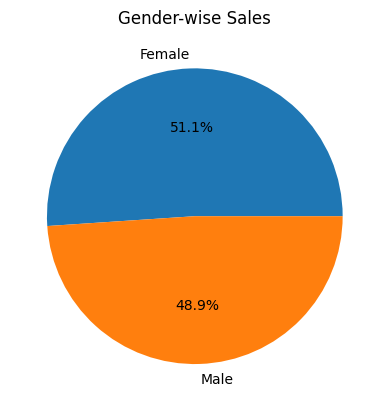

In [7]:
gender_sales = df.groupby('Gender')['Total_Amount'].sum()

gender_sales.plot(kind='pie', autopct='%1.1f%%')
plt.title("Gender-wise Sales")
plt.ylabel("")
plt.show()

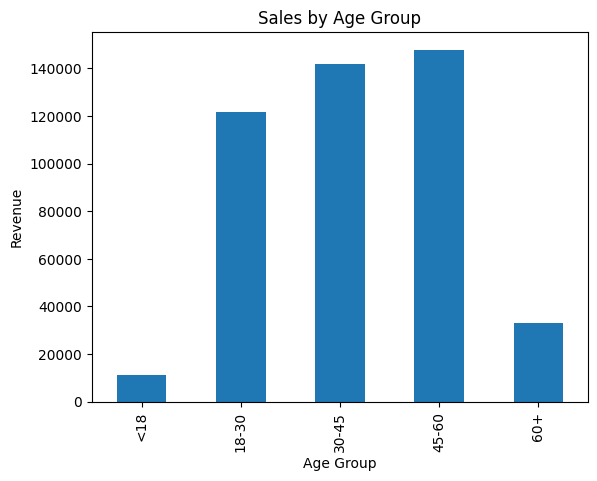

In [8]:
df['Age_Group'] = pd.cut(df['Age'], bins=[0,18,30,45,60,100],
                        labels=['<18','18-30','30-45','45-60','60+'])

age_sales = df.groupby('Age_Group', observed=False)['Total_Amount'].sum()

age_sales.plot(kind='bar')
plt.title("Sales by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Revenue")
plt.show()

In [9]:
# Top customers
top_customers = df.groupby('Customer_ID')['Total_Amount'].sum().sort_values(ascending=False)

top_customers.head()

Customer_ID
CUST015    2000
CUST412    2000
CUST970    2000
CUST547    2000
CUST281    2000
Name: Total_Amount, dtype: int64

In [10]:
best_selling = df.groupby('Product_Category')['Quantity'].sum().sort_values(ascending=False)

best_selling

Product_Category
Clothing       894
Electronics    849
Beauty         771
Name: Quantity, dtype: int64

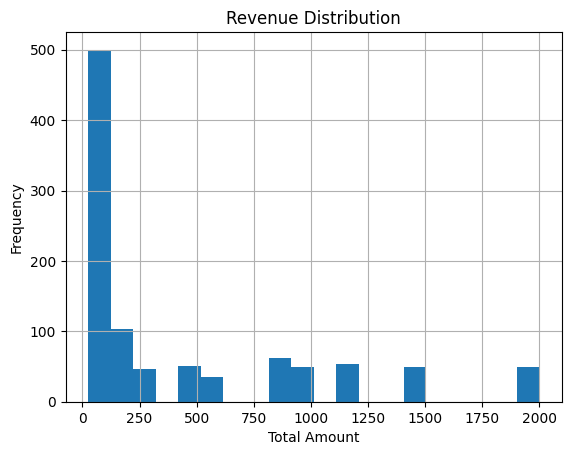

In [11]:
df['Total_Amount'].hist(bins=20)
plt.title("Revenue Distribution")
plt.xlabel("Total Amount")
plt.ylabel("Frequency")
plt.show()

## 📌 Business Insights

1. Sales show seasonal variation, indicating higher demand in certain months (notably May, October, and December).

2. The top-performing product category is Electronics.

3. The age group contributing most revenue is 45-60 years.

4. Gender-wise analysis shows that female customers spend more.

5. A small number of customers contribute to a large portion of revenue (high-value customers).

6. Some categories have low sales and can be improved with marketing strategies.